In [60]:
from __future__ import division

from biom import load_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
# read in data
full_meta = pd.read_table("data/797_prep_296_qiime_20150818-225202.txt", index_col=0)
results = pd.read_table("data/full_results.txt", index_col=0)
# sync meta with results
meta = full_meta.loc[results.columns[:-1]]
# read in standard deviations
results_std = pd.read_table("data/full_results_std.txt", index_col=0)
results_var = np.square(results_std)
# sort indicies so we are all in the same order
meta = meta.sort_index()
results = results.sort_index()
results_std = results_std.sort_index()

In [3]:
table = load_table("data/153_otu_table.s100.d1000.zzyvl.biom")
table = table.filter(results.columns[:-1], inplace=False)
print table.shape
print table.sum()

(1159, 503)
502702.0


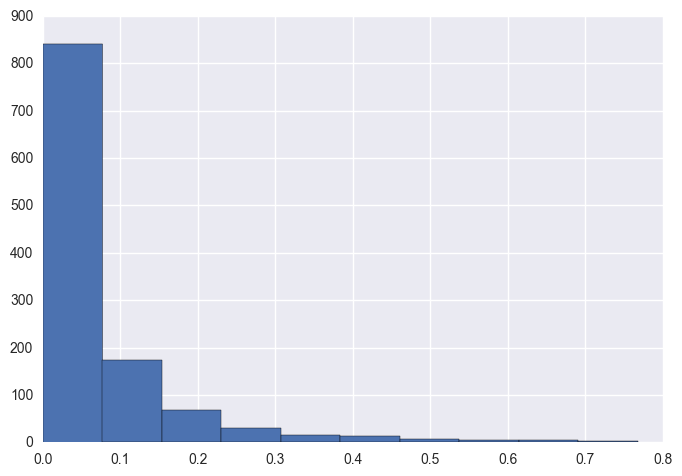

>10% 0.207937877481
>25% 0.0586712683348
>50% 0.0120793787748
>75% 0.000862812769629
>90% 0.0
>95% 0.0


In [61]:
plt.hist(table.pa(inplace=False).sum(axis="observation")/len(table.ids()))
plt.show()
print ">10%", np.sum(table.pa(inplace=False).sum(axis="observation")/len(table.ids())>.10)/table.shape[0]
print ">25%", np.sum(table.pa(inplace=False).sum(axis="observation")/len(table.ids())>.25)/table.shape[0]
print ">50%", np.sum(table.pa(inplace=False).sum(axis="observation")/len(table.ids())>.50)/table.shape[0]
print ">75%", np.sum(table.pa(inplace=False).sum(axis="observation")/len(table.ids())>.75)/table.shape[0]
print ">90%", np.sum(table.pa(inplace=False).sum(axis="observation")/len(table.ids())>.90)/table.shape[0]
print ">95%", np.sum(table.pa(inplace=False).sum(axis="observation")/len(table.ids())>.99)/table.shape[0]

In [5]:
table_forehead = table.filter([i for i in table.ids() if 'Stool' in i], inplace=False)
table_forehead.filter(table_forehead.ids(axis="observation")[table_forehead.sum(axis="observation") != 0], axis="observation")
print table_forehead.shape
table_tongue = table.filter([i for i in table.ids() if 'Tongue' in i], inplace=False)
table_tongue.filter(table_tongue.ids(axis="observation")[table_tongue.sum(axis="observation") != 0], axis="observation")
print table_tongue.shape
table_stool = table.filter([i for i in table.ids() if 'Forehead' in i], inplace=False)
table_stool.filter(table_stool.ids(axis="observation")[table_stool.sum(axis="observation") != 0], axis="observation")
print table_stool.shape

(631, 168)
(516, 171)
(1050, 164)


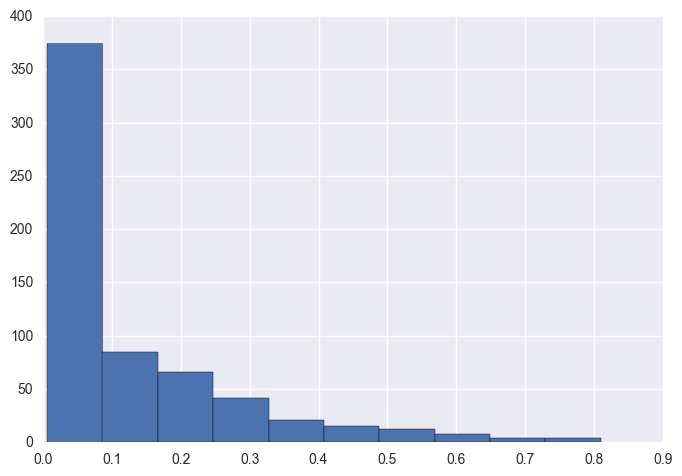

>25% 102
>50% 25
>75% 3
>90% 0
>95% 0


In [6]:
plt.hist(table_forehead.pa(inplace=False).sum(axis="observation")/len(table_forehead.ids()))
plt.show()
print ">25%", np.sum(table_forehead.pa(inplace=False).sum(axis="observation")/len(table_forehead.ids())>.25)
print ">50%", np.sum(table_forehead.pa(inplace=False).sum(axis="observation")/len(table_forehead.ids())>.50)
print ">75%", np.sum(table_forehead.pa(inplace=False).sum(axis="observation")/len(table_forehead.ids())>.75)
print ">90%", np.sum(table_forehead.pa(inplace=False).sum(axis="observation")/len(table_forehead.ids())>.90)
print ">95%", np.sum(table_forehead.pa(inplace=False).sum(axis="observation")/len(table_forehead.ids())>.99)

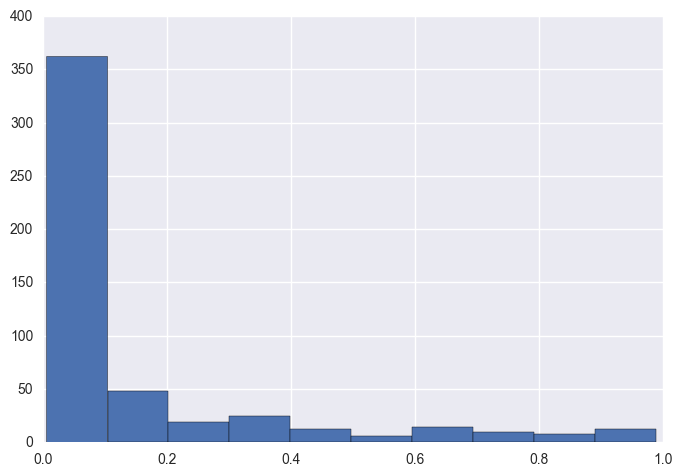

>25% 91
>50% 50
>75% 25
>90% 10
>95% 0


In [7]:
plt.hist(table_tongue.pa(inplace=False).sum(axis="observation")/len(table_tongue.ids()))
plt.show()
print ">25%", np.sum(table_tongue.pa(inplace=False).sum(axis="observation")/len(table_tongue.ids())>.25)
print ">50%", np.sum(table_tongue.pa(inplace=False).sum(axis="observation")/len(table_tongue.ids())>.50)
print ">75%", np.sum(table_tongue.pa(inplace=False).sum(axis="observation")/len(table_tongue.ids())>.75)
print ">90%", np.sum(table_tongue.pa(inplace=False).sum(axis="observation")/len(table_tongue.ids())>.90)
print ">95%", np.sum(table_tongue.pa(inplace=False).sum(axis="observation")/len(table_tongue.ids())>.99)

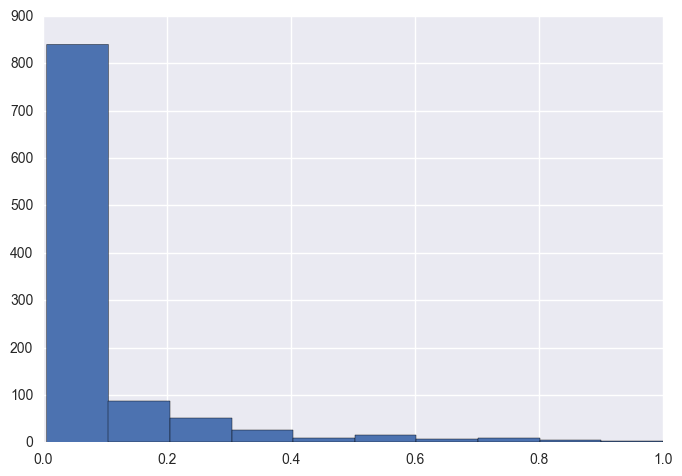

>25% 92
>50% 36
>75% 12
>90% 2
>95% 1


In [8]:
plt.hist(table_stool.pa(inplace=False).sum(axis="observation")/len(table_stool.ids()))
plt.show()
print ">25%", np.sum(table_stool.pa(inplace=False).sum(axis="observation")/len(table_stool.ids())>.25)
print ">50%", np.sum(table_stool.pa(inplace=False).sum(axis="observation")/len(table_stool.ids())>.50)
print ">75%", np.sum(table_stool.pa(inplace=False).sum(axis="observation")/len(table_stool.ids())>.75)
print ">90%", np.sum(table_stool.pa(inplace=False).sum(axis="observation")/len(table_stool.ids())>.90)
print ">95%", np.sum(table_stool.pa(inplace=False).sum(axis="observation")/len(table_stool.ids())>.99)

## Unique per family

In [54]:
unique_family_site = pd.DataFrame(index=["Family OTUs"])

for family in set(meta.family):
    infamily = meta.loc[meta.family==family].index
    outfamily = meta.loc[meta.family!=family].index
    infamily_table = table.filter(infamily, inplace=False)
    outfamily_table = table.filter(outfamily, inplace=False)
    infamily_present = infamily_table.sum(axis="observation") > 0
    outfamily_absent = outfamily_table.sum(axis="observation") == 0
    unique_family = infamily_table.ids(axis="observation")[np.logical_and(infamily_present, outfamily_absent)]
    if len(unique_family) > 0:
        unique_family_site[family] = [unique_family]

display(unique_family_site.transpose())
print unique_family_site.shape

,Family OTUs
2,[310018]
57,"[2936049, 996116]"
12,[4426982]
13,"[1094701, 570755]"
17,[4325163]
18,"[1056382, 968121]"
19,[966091]
20,[938243]
22,[4318710]
26,[4353325]


(1, 34)


## Unique per family per site

In [51]:
sites = ['forehead', 'tongue', 'stool']
unique_family_site = pd.DataFrame(index=["Site", "Family OTUs"])

for family in set(meta.family):
    meta_infamily = meta.loc[meta.family==family]
    meta_outfamily = meta.loc[meta.family!=family]
    for site in sites:
        infamily_site = meta_infamily.loc[meta_infamily.env==site].index
        infamily_table = table.filter(infamily_site, inplace=False)
        outfamily_site = meta_outfamily.loc[meta_outfamily.env==site].index
        outfamily_table = table.filter(meta_outfamily.index, inplace=False)
        infamily_present = infamily_table.pa(inplace=False).sum(axis="observation") > 1
        outfamily_absent = outfamily_table.pa(inplace=False).sum(axis="observation") == 0
        unique_faimly = infamily_table.ids(axis="observation")[np.logical_and(infamily_present, outfamily_absent)]
        if len(unique_faimly) > 0:
            unique_family_site[int(family)] = site, unique_faimly
display(unique_family_site.transpose())

,Site,Family OTUs
30,forehead,[543684]
29,forehead,[832652]
50,forehead,"[1667532, 4328665, 140863, 4305723]"


In [43]:
table.ids()[table.data('4305723', axis="observation")>0]

array(['797.50.HB.Forehead', '797.50.HA.Forehead'], dtype=object)